# SMOGN: Usage
---
## Example 1: Minimal


## Installation

First, we install SMOGN from the Github repository. Alternatively, we could install from the official PyPI distribution. However, the developer version is utilized here for the latest release.

In [0]:
## suppress install output
%%capture

## install pypi release
# pip install smogn

## install developer version
pip install git+https://github.com/nickkunz/smogn.git

## Libraries
Next, we load the required dependencies. Here we use `smogn` to apply the Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise. In addition, we use `pandas` for data handling, and `seaborn` to visualize our results.

In [0]:
## load dependencies
import smogn
import pandas
import seaborn

## Data
After, we load our data. In this example, we use the Ames Housing Dataset training split retreived from Kaggle, originally complied by Dean De Cock. In this case, we name our data `housing`


In [0]:
## load data
housing = pandas.read_csv(

    ## http://jse.amstat.org/v19n3/decock.pdf
    'https://raw.githubusercontent.com/nickkunz/smogn/master/data/housing.csv'
)

## Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise
Here we cover the focus of this example. We call the `smoter` function from this package (`smogn.smoter`) and satisfy the minimum required arguments: `data` and `y`.

The `data` argument takes a Pandas DataFrame, which contains the training set split. In this case, we input the previously loaded `housing` training set with follow input:

`data = housing`.

The `y` argument takes a string, which specifies a continuous reponse variable by header name. In this case, we input `'SalePrice'` in the interest of predicting the sale price of homes in Ames, Iowa with the following input:

`y = 'SalePrice'`. 

In [0]:
## conduct smogn
housing_smogn = smogn.smoter(
    
    data = housing, 
    y = 'SalePrice'
)

**Note:**

In this example, the regions of interest within the response variable `y` are automatically determined by values which are considered outliers (beyond the box plot's five number summary min/max).

The outliers are considered "rare" and are over-sampled by synethetic data generation through interpolation. The non-outliers are considered "normal" and are under-sampled by removal.

If there are no outliers contained in the reponse variable `y`, the argument `rel_method = manual` must be specified and an input matrix must be placed into seperate argument `rel_ctrl_pts_rg` indicating the regions of rarity in `y`.

More information regarding the matrix input to the `rel_ctrl_pts_rg` argument and manual over-sampling can be found within the functions's doc string and will not be further discussed in this example.

It is also important to mention that by default, `smogn.smoter` will first automatically remove columns containing missing values and then remove rows, as it cannot input data containing missing values. This feature can be changed with the boolean arguments `drop_na_col = False` and `drop_na_rows = False`.

## Results
After conducting Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise, we briefly examine the results. We see that the number of observations (rows) in the original training set increased from 1460 to 1912, while the number of features (columns) decreased from 81 to 62. 

Recall that `smogn.smoter` automatically removes features containing missing values. In this case, 19 features contained missing values and were therefore omitted.

The additional 452 observations were a result of over-sampling. More detailed information in this regard can be found in the original paper cited in the **References** section.



In [0]:
## dimensions - original data 
housing.shape

(1460, 81)

In [0]:
## dimensions - modified data
housing_smogn.shape

(1912, 62)

Further examining the results, we can see that the distribution of the response variable `'SalePrice'` has changed. By calling the `box_plot_stats` function from this package (`smogn.box_plot_stats`) we can quickly verify the over/under-sampling results. 

Notice that the modified training set's five number summary has changed, where it has "skewed right" when compared to the original training set.

In [0]:
## box plot stats - original data 
smogn.box_plot_stats(housing['SalePrice'])['stats']

array([ 34900., 129950., 163000., 214000., 340000.])

In [0]:
## box plot stats - modified data
smogn.box_plot_stats(housing_smogn['SalePrice'])['stats']

array([ 34900. , 140000. , 194100.5, 280131. , 487458. ])

Plotting the results of the response variable `'SalePrice'` of both the original and modified training sets, the "skewed right" distribution of the modified training set becomes more evident. 

Recall that the max value of the box plot's five number summary from the original data set was 340,000. Examining the modified training set's distribution plot, it is easier to see that the original training set contained a number of observations whose response variable was considered an outlier. 

In this case, SMOGN over-sampled observations whose `'SalePrice'` was greater than 340,000 (those considered "rare") and under-sampled observations from values less than 340,000 (those considered "normal").

This is perhaps most useful when the values of interest in predicting are not frequently found within a given dataset.



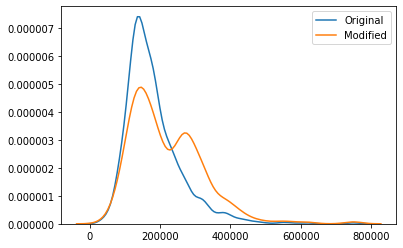

In [0]:
## distribution plot
seaborn.kdeplot(housing['SalePrice'], label = "Original")
seaborn.kdeplot(housing_smogn['SalePrice'], label = "Modified")

## Conclusion
In this example, we covered the fundamentals of SMOGN. We utilized the Ames Housing Dataset to conduct Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise with the minimum required arguments. SMOGN over-sampled or generated synthetic observations for "rare" values in the continuous response variable `'SalePrice'` and under-sampled or removed observations for "normal" values. The results were briefly examined with the box plot's five number summary and plotted for visual confirmation.

More examples, where additional features of SMOGN are explored can be found within the packages example directory. Developer updates are available in the package's Github repository at https://github.com/nickkunz/smogn. Official releases are available in the Python Package Index and can be found at https://pypi.org/project/smogn.



## References

Branco, P., Torgo, L., Ribeiro, R. (2017). SMOGN: A Pre-Processing Approach for Imbalanced Regression. Proceedings of Machine Learning Research, 74:36-50. http://proceedings.mlr.press/v74/branco17a/branco17a.pdf.

De Cock, D. (2011). Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project. Journal of Statistics Education 19(3). https://doi.org/10.1080/10691898.2011.11889627.

Kunz, N. (2019). SMOGN: Synthetic Minority Over-Sampling for Regression with Gaussian Noise (Version 0.0.6). Python Package Index.
https://pypi.org/project/smogn. 